In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('spam.csv',encoding='latin1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [4]:
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.head()

,target,text,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [5]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()


In [6]:
df['target']=encoder.fit_transform(df['target'])
df.head()

,target,text,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,0,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,0,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,0,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,0,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [7]:

df['target'].value_counts()

target
0    4825
1     747
Name: count, dtype: int64

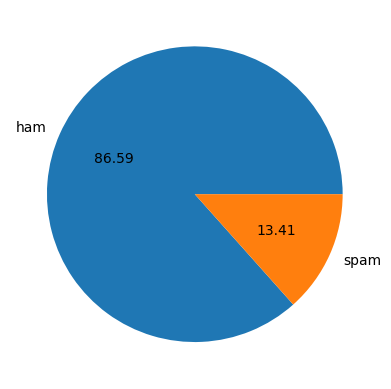

In [8]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [9]:
import nltk
nltk.download('punkt',quiet=True)

True

In [10]:
df['characters'] = df['text'].apply(len)
df['words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))
df['sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))
df.head()

,target,text,Unnamed: 2,Unnamed: 3,Unnamed: 4,characters,words,sentences
0,0,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN,111,24,2
1,0,Ok lar... Joking wif u oni...,NaN,NaN,NaN,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN,155,37,2
3,0,U dun say so early hor... U c already then say...,NaN,NaN,NaN,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN,61,15,1


In [11]:
df[['characters','words','sentences']].describe()

,characters,words,sentences
count,5572.000000,5572.000000,5572.000000
mean,80.118808,18.699390,1.996411
std,59.690841,13.741932,1.520159
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,61.000000,15.000000,1.500000
75%,121.000000,27.000000,2.000000
max,910.000000,220.000000,38.000000


In [12]:
df[df['target'] == 0][['characters','words','sentences']].describe()

,characters,words,sentences
count,4825.000000,4825.000000,4825.000000
mean,71.023627,17.276269,1.837720
std,58.016023,13.988585,1.454388
min,2.000000,1.000000,1.000000
25%,33.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,92.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [13]:
df[df['target'] == 1][['characters','words','sentences']].describe()

,characters,words,sentences
count,747.000000,747.000000,747.000000
mean,138.866131,27.891566,3.021419
std,29.183082,6.867007,1.537580
min,13.000000,2.000000,1.000000
25%,132.500000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


<Axes: xlabel='characters', ylabel='Count'>

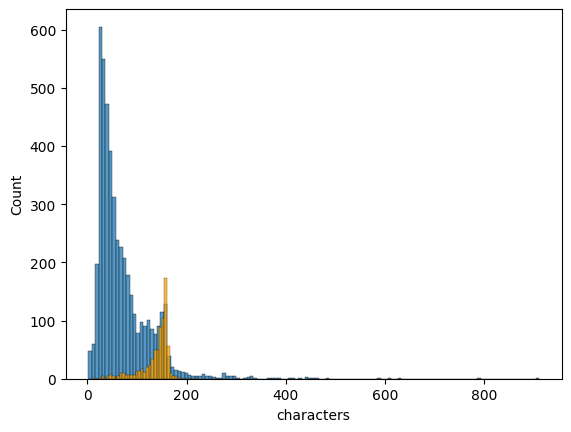

In [14]:
sns.histplot(df[df['target'] == 0]['characters'])
sns.histplot(df[df['target'] == 1]['characters'],color='orange')

<Axes: xlabel='words', ylabel='Count'>

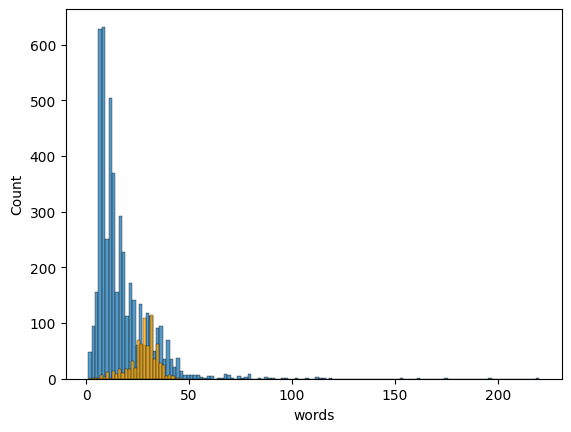

In [15]:
sns.histplot(df[df['target'] == 0]['words'])
sns.histplot(df[df['target'] == 1]['words'],color='orange')

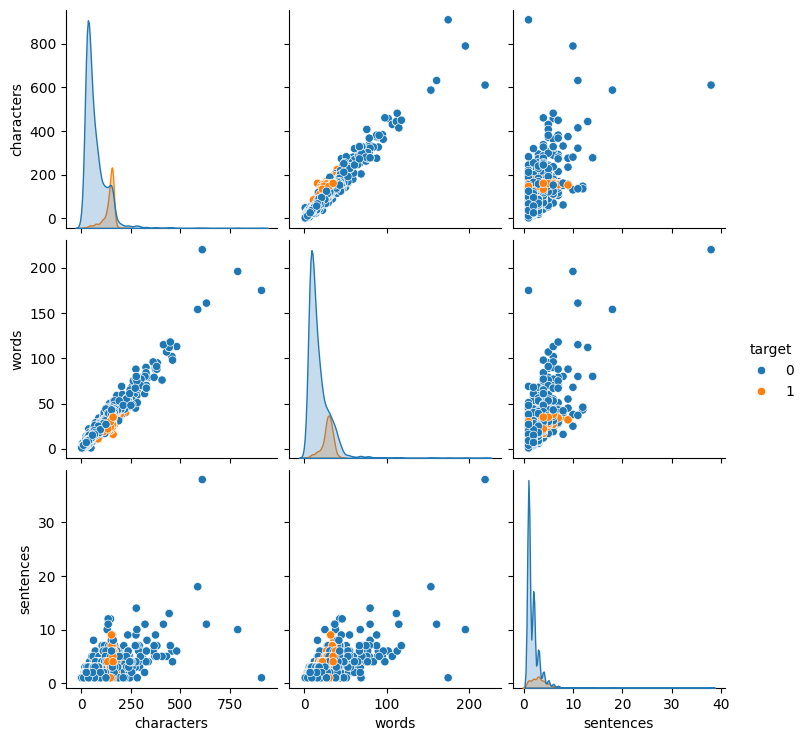

In [16]:
sns.pairplot(df,hue='target')

In [17]:
import string
string.punctuation

import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
english_stopwords = stopwords.words('english')

from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Srikrishna\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [18]:
def transform(text):                          
    text = text.lower()                     
    text = nltk.word_tokenize(text)        
    
    y=[]
    for i in text:
        if i.isalnum():                     #for removing non alpha-numeric characters
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text: 
         if i not in english_stopwords and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))           
            
    return " ".join(y)   

In [19]:
df['transformed_text'] = df['text'].apply(transform)

In [20]:
df.head()

,target,text,Unnamed: 2,Unnamed: 3,Unnamed: 4,characters,words,sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN,111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,NaN,NaN,NaN,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,NaN,NaN,NaN,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN,61,15,1,nah think goe usf live around though


In [21]:
spam_corpus = []
for message in df[df['target'] == 1]['transformed_text'].tolist():
    for word in message.split():
        spam_corpus.append(word)
len(spam_corpus)

11490

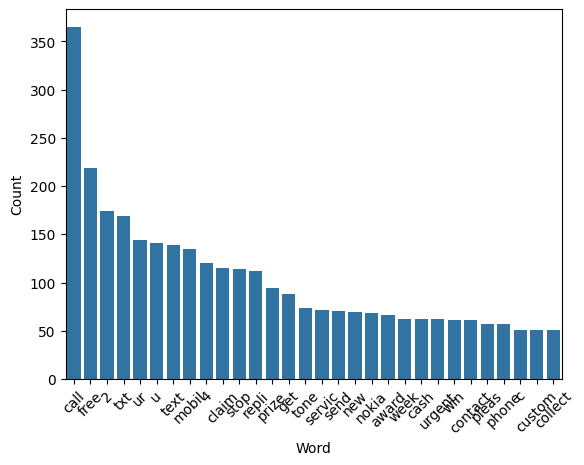

In [22]:
from collections import Counter
word_counter = Counter(spam_corpus)
word_counts_df = pd.DataFrame(word_counter.most_common(30), columns=['Word', 'Count'])
sns.barplot(x='Word', y='Count', data=word_counts_df)

plt.xticks(rotation=45)
plt.show()

In [23]:
ham_corpus = []
for message in df[df['target'] == 0]['transformed_text'].tolist():
    for word in message.split():
        ham_corpus.append(word)

In [24]:
len(ham_corpus)

38221

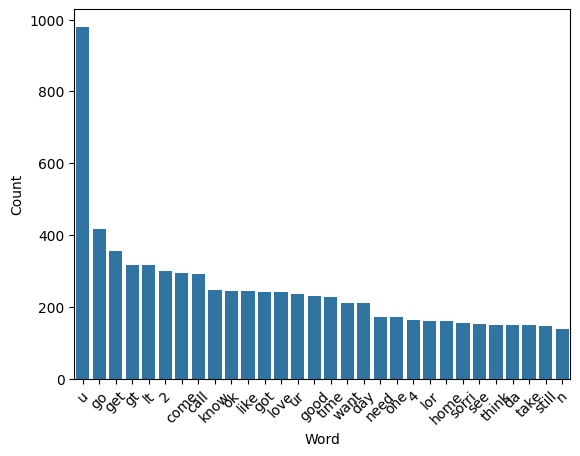

In [25]:
word_counter2 = Counter(ham_corpus)
word_counts_df2 = pd.DataFrame(word_counter2.most_common(30), columns=['Word', 'Count'])
sns.barplot(x='Word', y='Count', data=word_counts_df2)

plt.xticks(rotation=45)
plt.show()

In [26]:
y = df['target'].values

In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=3000)
X = tfidf.fit_transform(df['transformed_text']).toarray()
X.shape

(5572, 3000)

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [29]:
y = df['target'].values

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [31]:
from sklearn.naive_bayes import MultinomialNB                  
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

mnb = MultinomialNB()

In [32]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)


print("Accuracy Score:", accuracy_score(y_test, y_pred2))


print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred2))


print("Precision Score:", precision_score(y_test, y_pred2))

Accuracy Score: 0.9650224215246637
Confusion Matrix:
 [[956   1]
 [ 38 120]]
Precision Score: 0.9917355371900827


In [33]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))